In [5]:
# https://deeplearningcourses.com/c/deep-learning-gans-and-variational-autoencoders
# https://www.udemy.com/deep-learning-gans-and-variational-autoencoders
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import util
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [6]:
class BayesClassifier:
  def fit(self, X, Y):
    # assume classes are numbered 0...K-1
    self.K = len(set(Y))

    self.gaussians = []
    self.p_y = np.zeros(self.K)
    for k in range(self.K):
      Xk = X[Y == k]
      self.p_y[k] = len(Xk)
      mean = Xk.mean(axis=0)
      cov = np.cov(Xk.T)
      g = {'m': mean, 'c': cov}
      self.gaussians.append(g)
    # normalize p(y)
    self.p_y /= self.p_y.sum()

  def sample_given_y(self, y):
    g = self.gaussians[y]
    return mvn.rvs(mean=g['m'], cov=g['c'])

  def sample(self):
    y = np.random.choice(self.K, p=self.p_y)
    return self.sample_given_y(y)

Reading in and transforming data...


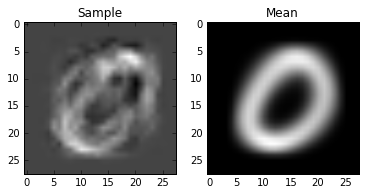

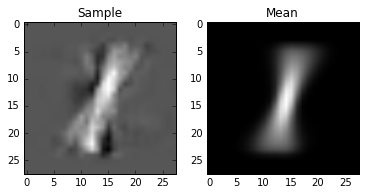

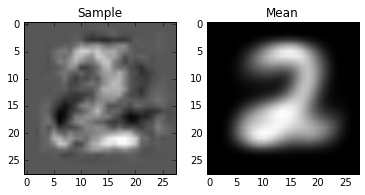

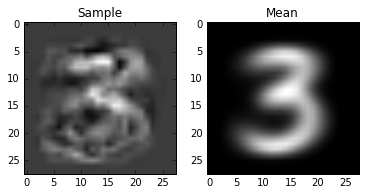

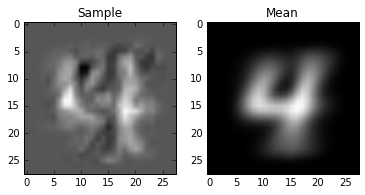

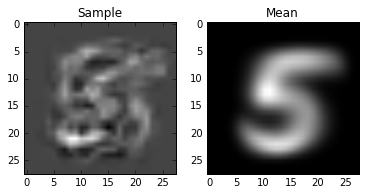

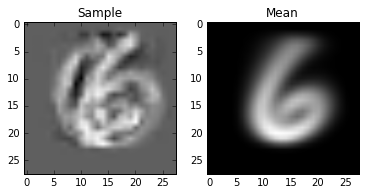

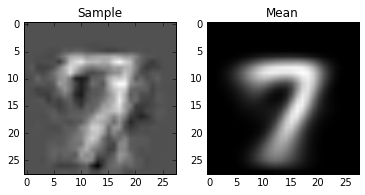

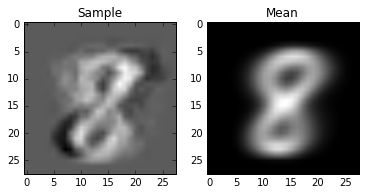

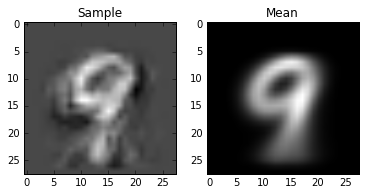

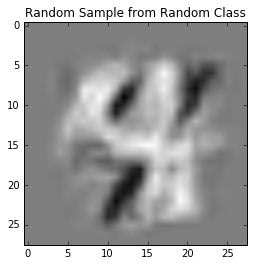

In [8]:
if __name__ == '__main__':
  X, Y = util.get_mnist()
  clf = BayesClassifier()
  clf.fit(X, Y)

  for k in range(clf.K):
    # show one sample for each class
    # also show the mean image learned

    sample = clf.sample_given_y(k).reshape(28, 28)
    mean = clf.gaussians[k]['m'].reshape(28, 28)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

  # generate a random sample
  sample = clf.sample().reshape(28, 28)
  plt.imshow(sample, cmap='gray')
  plt.title("Random Sample from Random Class")
  plt.show()